In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full , y_train_full) , (X_test , y_test) = fashion_mnist.load_data()

In [5]:
X_train_full = X_train_full.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [6]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [7]:
X_valid , X_train =X_train_n[:5000] , X_train_n[5000:]
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [15]:
model_history = model.fit(X_train , y_train , epochs=30 , batch_size=64 , validation_data=(X_valid ,y_valid))

Epoch 1/30
860/860 [==============================] - 28s 33ms/step - loss: 0.8775 - accuracy: 0.6987 - val_loss: 0.7581 - val_accuracy: 0.7340
Epoch 2/30
860/860 [==============================] - 28s 33ms/step - loss: 0.5389 - accuracy: 0.8049 - val_loss: 0.4946 - val_accuracy: 0.8162
Epoch 3/30
860/860 [==============================] - 28s 32ms/step - loss: 0.4812 - accuracy: 0.8261 - val_loss: 0.9108 - val_accuracy: 0.7126
Epoch 4/30
860/860 [==============================] - 28s 32ms/step - loss: 0.4438 - accuracy: 0.8415 - val_loss: 0.4131 - val_accuracy: 0.8568
Epoch 5/30
860/860 [==============================] - 28s 32ms/step - loss: 0.4197 - accuracy: 0.8499 - val_loss: 0.4364 - val_accuracy: 0.8480
Epoch 6/30
860/860 [==============================] - 28s 32ms/step - loss: 0.3957 - accuracy: 0.8581 - val_loss: 0.3770 - val_accuracy: 0.8716
Epoch 7/30
860/860 [==============================] - 28s 33ms/step - loss: 0.3781 - accuracy: 0.8662 - val_loss: 0.4068 - val_accuracy:

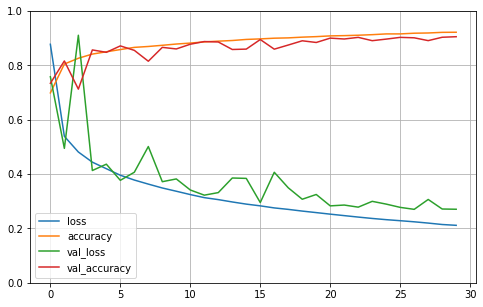

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
ev=model.evaluate(X_test_n , y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2800 - accuracy: 0.8997


In [18]:
ev

[0.2799721360206604, 0.8996999859809875]

In [19]:
X_new=X_test[:3]

In [20]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [21]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


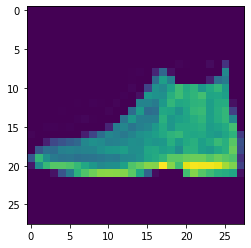

In [22]:
print(plt.imshow(X_test[0].reshape((28,28))))

#  WITHOUT POOLING

In [25]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(300,activation="relu"))
model2.add(keras.layers.Dense(100,activation="relu"))
model2.add(keras.layers.Dense(10,activation="softmax"))

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [28]:
model_history = model2.fit(X_train , y_train , epochs=30 , batch_size=64 , validation_data=(X_valid ,y_valid))

Epoch 1/30
860/860 [==============================] - 48s 56ms/step - loss: 0.7397 - accuracy: 0.7457 - val_loss: 0.7132 - val_accuracy: 0.7544
Epoch 2/30
860/860 [==============================] - 48s 55ms/step - loss: 0.4945 - accuracy: 0.8220 - val_loss: 0.4671 - val_accuracy: 0.8224
Epoch 3/30
860/860 [==============================] - 47s 55ms/step - loss: 0.4427 - accuracy: 0.8396 - val_loss: 1.0191 - val_accuracy: 0.6936
Epoch 4/30
860/860 [==============================] - 47s 55ms/step - loss: 0.4100 - accuracy: 0.8522 - val_loss: 0.3891 - val_accuracy: 0.8596
Epoch 5/30
860/860 [==============================] - 47s 55ms/step - loss: 0.3880 - accuracy: 0.8601 - val_loss: 0.3854 - val_accuracy: 0.8572
Epoch 6/30
860/860 [==============================] - 48s 55ms/step - loss: 0.3672 - accuracy: 0.8660 - val_loss: 0.3581 - val_accuracy: 0.8714
Epoch 7/30
860/860 [==============================] - 47s 55ms/step - loss: 0.3535 - accuracy: 0.8716 - val_loss: 0.3934 - val_accuracy: